In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub
import shutil
import os

# Download the dataset
download_path = kagglehub.dataset_download("arsalanjamal002/student-sleep-patterns")
csv_path = os.path.join(download_path, "student_sleep_patterns.csv")

# Move to working directory (if needed)
working_path = "/content/student_sleep_patterns.csv"
shutil.copy(csv_path, working_path)

'/content/student_sleep_patterns.csv'

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/student_sleep_patterns.csv")

# Show basic info
print("Shape:", df.shape)
df.head()


Shape: (500, 14)


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [ ]:
# Check missing values and data types
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB
None

Missing values:
 Student_I

In [ ]:
df.describe(include='all')


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,3rd Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,186,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250.500000,21.53600,NaN,NaN,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,NaN,NaN,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,NaN,NaN,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,NaN,NaN,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,NaN,NaN,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,NaN,NaN,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000


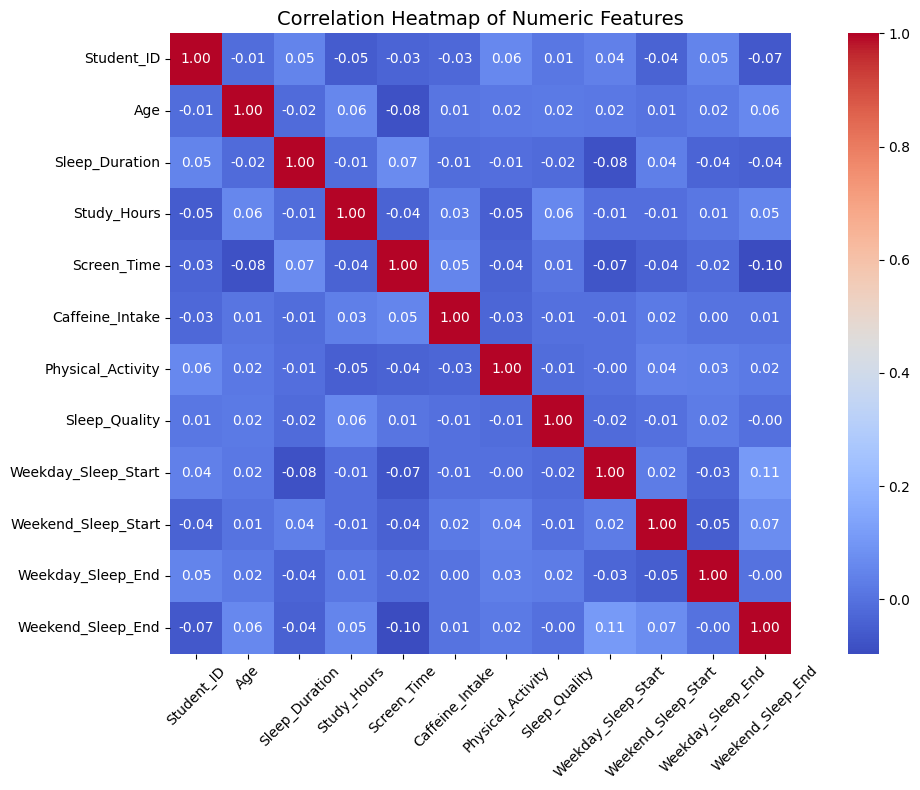

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric features for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Only select numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation of each feature with Sleep_Quality
correlation_with_target = numeric_df.corr()['Sleep_Quality'].sort_values(ascending=False)

# Display correlation with Sleep_Quality
print("Correlation of features with Sleep_Quality:\n")
print(correlation_with_target)


Correlation of features with Sleep_Quality:

Sleep_Quality          1.000000
Study_Hours            0.058708
Weekday_Sleep_End      0.024978
Age                    0.019969
Student_ID             0.013035
Screen_Time            0.009411
Weekend_Sleep_End     -0.004829
Weekend_Sleep_Start   -0.006250
Caffeine_Intake       -0.006272
Physical_Activity     -0.013509
Weekday_Sleep_Start   -0.015498
Sleep_Duration        -0.015639
Name: Sleep_Quality, dtype: float64


In [ ]:
# Feature engineering based on domain knowledge
df['Sleep_Consistency'] = abs(df['Weekday_Sleep_Start'] - df['Weekend_Sleep_Start'])  # Irregular bedtime
df['Sleep_Regularity'] = abs(df['Weekday_Sleep_End'] - df['Weekend_Sleep_End'])      # Irregular wake time
df['Net_Screen_Impact'] = df['Screen_Time'] - (df['Physical_Activity'] / 60)         # More screen time & less activity
df['Late_Sleeper'] = np.where(df['Weekday_Sleep_Start'] > 23, 1, 0)                   # Binary flag


In [ ]:
# Include relevant features for correlation analysis
correlation_features = [
    'Sleep_Quality', 'Sleep_Duration', 'Study_Hours', 'Screen_Time',
    'Caffeine_Intake', 'Physical_Activity', 'Weekday_Sleep_Start', 'Weekday_Sleep_End',
    'Weekend_Sleep_Start', 'Weekend_Sleep_End',
    'Sleep_Consistency', 'Sleep_Regularity', 'Net_Screen_Impact', 'Late_Sleeper'
]

# Compute correlation matrix
correlation_matrix = df[correlation_features].corr()

# Correlation of all features with Sleep_Quality
correlation_with_sleep_quality = correlation_matrix['Sleep_Quality'].sort_values(ascending=False)

# Display
print("Correlation of features with Sleep_Quality:\n")
print(correlation_with_sleep_quality)


Correlation of features with Sleep_Quality:

Sleep_Quality          1.000000
Study_Hours            0.058708
Weekday_Sleep_End      0.024978
Net_Screen_Impact      0.015131
Screen_Time            0.009411
Weekend_Sleep_End     -0.004829
Weekend_Sleep_Start   -0.006250
Caffeine_Intake       -0.006272
Sleep_Regularity      -0.010796
Physical_Activity     -0.013509
Weekday_Sleep_Start   -0.015498
Sleep_Duration        -0.015639
Sleep_Consistency     -0.039892
Late_Sleeper                NaN
Name: Sleep_Quality, dtype: float64


In [ ]:
# Check value counts of Late_Sleeper
print(df['Late_Sleeper'].value_counts(dropna=False))


Late_Sleeper
0    500
Name: count, dtype: int64


In [ ]:
df.drop('Late_Sleeper', axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Encode categorical variables
df['Gender_Encoded'] = LabelEncoder().fit_transform(df['Gender'])
df['University_Year_Encoded'] = LabelEncoder().fit_transform(df['University_Year'])

# Target
y = df['Sleep_Quality'].apply(lambda x: 1 if x >= 7 else 0)

# Features (excluding original categoricals and ID)
drop_cols = ['Student_ID', 'Gender', 'University_Year', 'Sleep_Quality']
X = df.drop(columns=drop_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Fit baseline Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_resampled, y_resampled)

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

from IPython.display import display
display(importances)


,Feature,Importance
2,Study_Hours,0.092791
10,Sleep_Consistency,0.087786
8,Weekday_Sleep_End,0.087655
1,Sleep_Duration,0.086333
5,Physical_Activity,0.083880
6,Weekday_Sleep_Start,0.077628
9,Weekend_Sleep_End,0.077171
11,Sleep_Regularity,0.073676
12,Net_Screen_Impact,0.072304
7,Weekend_Sleep_Start,0.070260


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Select top 10 features
top_features = [
    'Study_Hours', 'Sleep_Consistency', 'Weekday_Sleep_End',
    'Sleep_Duration', 'Physical_Activity', 'Weekday_Sleep_Start',
    'Weekend_Sleep_End', 'Sleep_Regularity', 'Net_Screen_Impact',
    'Weekend_Sleep_Start'
]

X_top = df[top_features]
y = df['Sleep_Quality'].apply(lambda x: 1 if x >= 7 else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train Models
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
svm = SVC(C=1, kernel='linear', probability=True, class_weight='balanced', random_state=42)

rf.fit(X_resampled, y_resampled)
gb.fit(X_resampled, y_resampled)
svm.fit(X_resampled, y_resampled)

# Evaluation
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'SVM': svm}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-score': round(f1_score(y_test, y_pred), 4),
        'AUC-ROC': round(roc_auc_score(y_test, y_proba), 4)
    })

# Show comparison table
final_results_df = pd.DataFrame(results)
display(final_results_df)


,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Random Forest,0.50,0.3421,0.3421,0.3421,0.4406
1,Gradient Boosting,0.46,0.3000,0.3158,0.3077,0.4677
2,SVM,0.52,0.3913,0.4737,0.4286,0.4605


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# -----------------------------
# Step 1: Prepare features
# -----------------------------
top_features = [
    'Study_Hours', 'Sleep_Consistency', 'Weekday_Sleep_End',
    'Sleep_Duration', 'Physical_Activity', 'Weekday_Sleep_Start',
    'Weekend_Sleep_End', 'Sleep_Regularity', 'Net_Screen_Impact',
    'Weekend_Sleep_Start'
]

X = df[top_features]
y = df['Sleep_Quality'].apply(lambda x: 1 if x >= 7 else 0)

# -----------------------------
# Step 2: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Step 3: SMOTE
# -----------------------------
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# -----------------------------
# Step 4: Define Models and Grids
# -----------------------------
model_grids = {
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'SVM': {
        'model': SVC(probability=True, class_weight='balanced', random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# -----------------------------
# Step 5: Train + Tune + Evaluate
# -----------------------------
results = []
for name, config in model_grids.items():
    print(f"🔍 Tuning {name}...")

    if name == 'SVM':
        # Feature scaling for SVM only
        scaler = StandardScaler()
        X_resampled_scaled = scaler.fit_transform(X_resampled)
        X_test_scaled = scaler.transform(X_test)
        grid = GridSearchCV(config['model'], config['params'], cv=3, scoring='f1', n_jobs=-1)
        grid.fit(X_resampled_scaled, y_resampled)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    else:
        grid = GridSearchCV(config['model'], config['params'], cv=3, scoring='f1', n_jobs=-1)
        grid.fit(X_resampled, y_resampled)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred, zero_division=0), 4),
        'Recall': round(recall_score(y_test, y_pred, zero_division=0), 4),
        'F1-score': round(f1_score(y_test, y_pred, zero_division=0), 4),
        'AUC-ROC': round(roc_auc_score(y_test, y_proba), 4)
    })

    print(f" Best Params for {name}: {grid.best_params_}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("=" * 60)

# -----------------------------
# Step 6: Summary Table
# -----------------------------
final_results_df = pd.DataFrame(results)
display(final_results_df)


🔍 Tuning Random Forest...
 Best Params for Random Forest: {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.59      0.60      0.59        62
           1       0.32      0.32      0.32        38

    accuracy                           0.49       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.49      0.49      0.49       100

🔍 Tuning Gradient Boosting...
 Best Params for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        62
           1       0.31      0.34      0.33        38

    accuracy                           0.46       100
   macro avg       0.44      0.44      0.44       100
weighted avg       0.47      0.46      0.46       100

🔍 Tuning SVM...
 Best Params for SVM: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

  

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Random Forest,0.49,0.3243,0.3158,0.3200,0.4355
1,Gradient Boosting,0.46,0.3095,0.3421,0.3250,0.4503
2,SVM,0.52,0.3611,0.3421,0.3514,0.5242
